In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN

# 군집화(cluster)
- 레이블이 없는 데이터 셋에 대해서 알고리즘에 의해서 군집을 분류하는 모델

In [4]:
x, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0
)

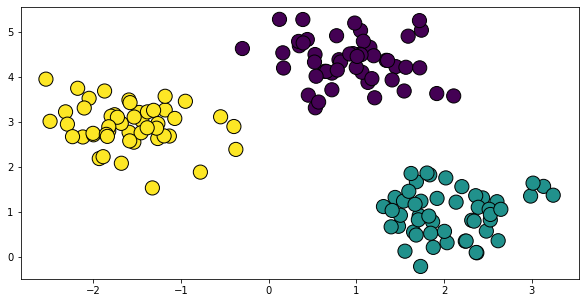

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(x[:,0], x[:,1], c=y, s=200, edgecolors='k')
plt.show()

# K-Means

In [10]:
model = KMeans(
    n_clusters=4,
    random_state=123
).fit(x)

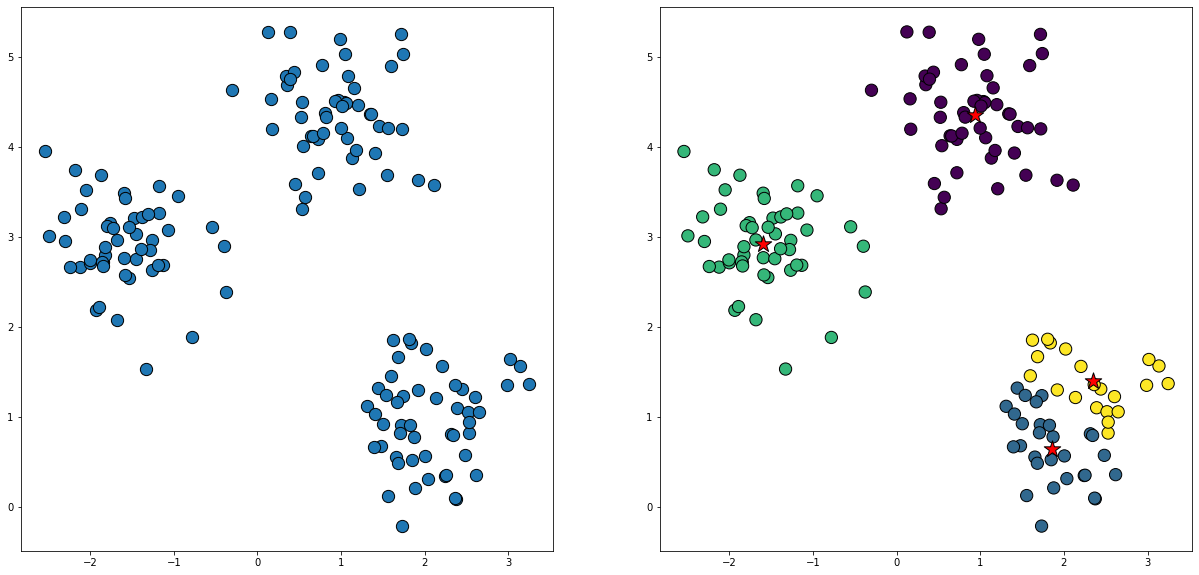

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))
axes[0].scatter(x[:,0], x[:,1], s=150, edgecolor='k')
axes[1].scatter(x[:,0], x[:,1], c=model.labels_, s=150, edgecolor='k')
axes[1].scatter(
    model.cluster_centers_[:,0], 
    model.cluster_centers_[:,1], 
    marker='*', c='red', s=300, edgecolor='k'
)
plt.show()

## 적정한 K는 어떻게? 
- 엘보우 메소드

In [22]:
cost = []
for k in range(1, 11):
    model = KMeans(
        n_clusters=k,
        random_state=123
    ).fit(x)
    cost.append(model.inertia_)

In [23]:
cost

[713.699828943416,
 283.461017802093,
 72.47601670996696,
 62.840617685422224,
 53.869690942443206,
 46.72446037728797,
 40.97369314527784,
 34.98692152724285,
 31.101784950989586,
 27.192622383381853]

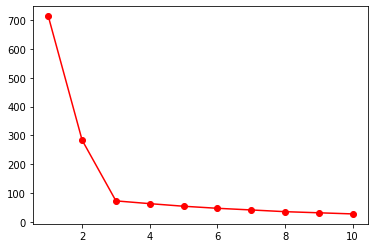

In [24]:
plt.plot(range(1,11), cost, 'ro-')
plt.show()

# DBSCAN

In [30]:
model = DBSCAN(
    eps = 0.1, 
    min_samples = 3
)
yhat = model.fit_predict(x)

In [31]:
yhat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1, -1,  6,
       -1, -1, -1,  1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,  0,  4,  2,
        3, -1, -1, -1,  1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  4, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,  5, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  5,  2, -1,  5,  3,  6,  1, -1, -1, -1, -1,  5, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

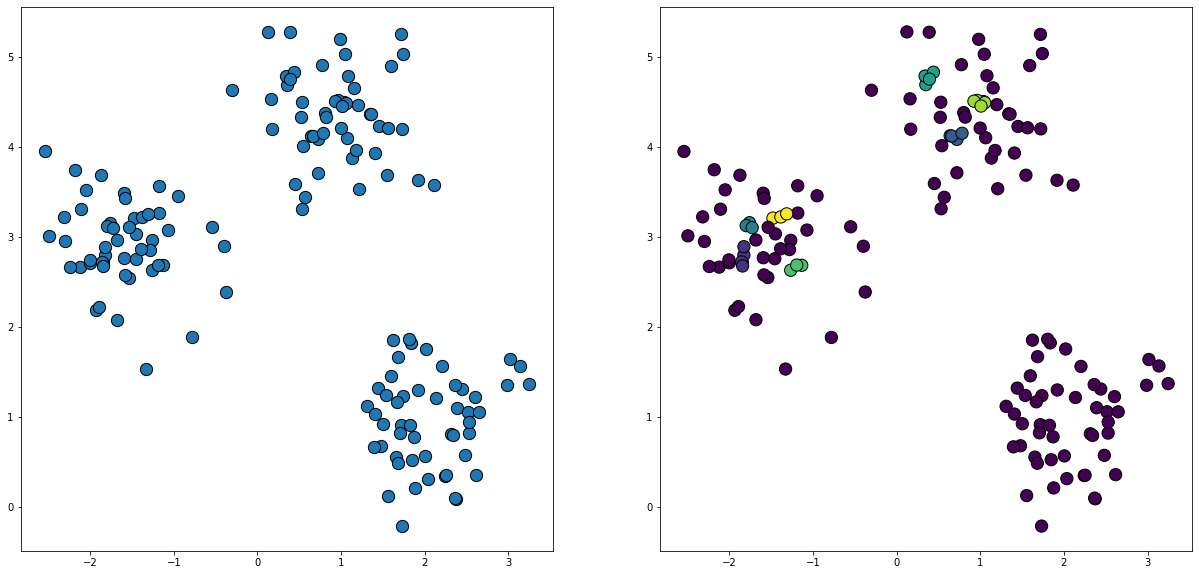

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))
axes[0].scatter(x[:,0], x[:,1], s=150, edgecolor='k')
axes[1].scatter(x[:,0], x[:,1], c=yhat, s=150, edgecolor='k')
plt.show()

# 현실 세계의 데이터라면? 

In [35]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

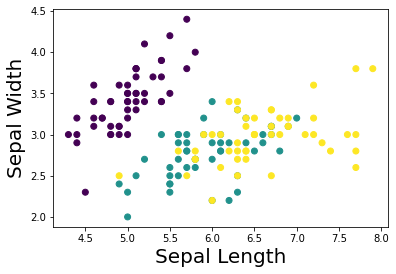

In [36]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal Length', fontsize=20)
plt.ylabel('Sepal Width', fontsize=20)
plt.show()

In [37]:
model = KMeans(
    n_clusters=3,
    random_state=123
).fit(x)

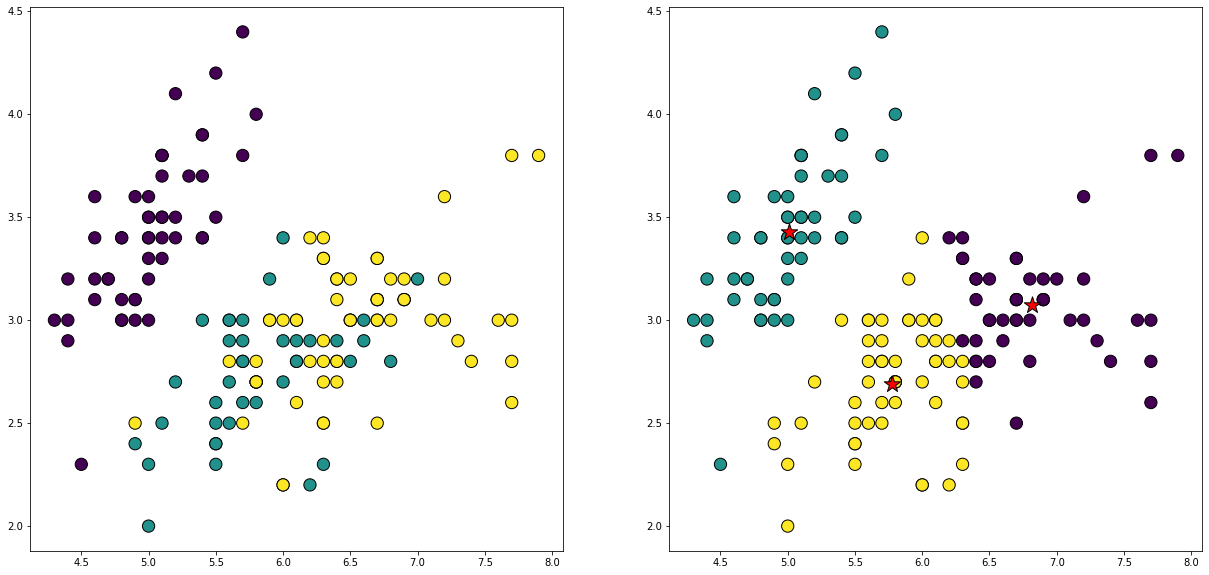

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))
axes[0].scatter(x[:,0], x[:,1], c=y, s=150, edgecolor='k')
axes[1].scatter(x[:,0], x[:,1], c=model.labels_, s=150, edgecolor='k')
axes[1].scatter(
    model.cluster_centers_[:,0], 
    model.cluster_centers_[:,1], 
    marker='*', c='red', s=300, edgecolor='k'
)
plt.show()

In [39]:
cost = []
for k in range(1, 11):
    model = KMeans(
        n_clusters=k,
        random_state=123
    ).fit(x)
    cost.append(model.inertia_)

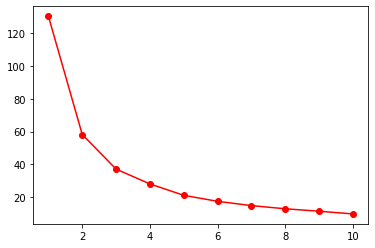

In [40]:
plt.plot(range(1,11), cost, 'ro-')
plt.show()

In [51]:
model = DBSCAN(
    eps = 0.3,
    min_samples = 5
)
yhat = model.fit_predict(x)

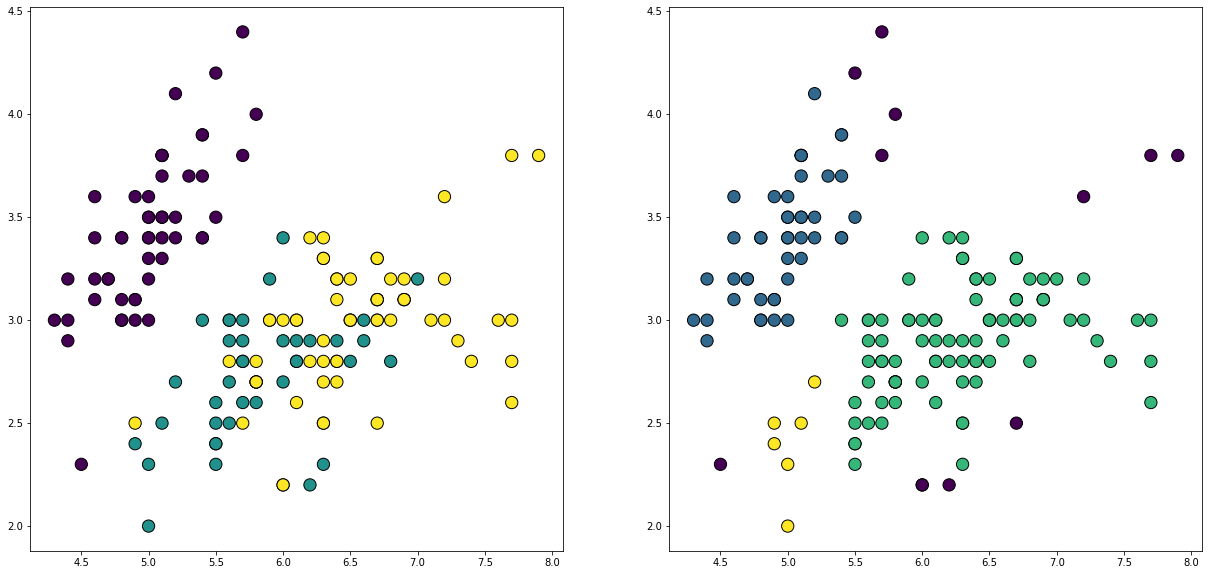

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(21, 10))
axes[0].scatter(x[:,0], x[:,1], c=y, s=150, edgecolor='k')
axes[1].scatter(x[:,0], x[:,1], c=yhat, s=150, edgecolor='k')
plt.show()